In [40]:
import numpy as np
import pandas as pd
import itertools as it
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,confusion_matrix,recall_score,accuracy_score
from sklearn.metrics import roc_curve, auc,precision_recall_curve, roc_curve
import matplotlib.pylab as plt
import tsne
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as pa

## Carga de Datos

In [4]:
DataIn = pd.read_excel('Data.xlsx')
DataIn = DataIn.set_index('Date')
Data = DataIn.dropna(axis=0,how='any')
Y = Data['Class']
X = Data.drop('Class', axis = 1)

In [5]:
Data = pd.read_excel('Data.xlsx')
Data = Data.set_index('Date')

# Definición de funciones para optimización de hyper parametros

## Parametrización 

In [14]:
Epsilon = 0.2
delta = 0.1
Hyper_Parameters = [['l1','l2'],[100,150,200]] 
set_parameters = [i for i in it.product(*Hyper_Parameters)]
sample_size = X.shape[0]
training_sample_size = int(sample_size * 0.6)
validation_sample_size = int(sample_size * 0.2)
test_sample_size = validation_sample_size

## División de datos en: Entrenamiento, Pruebas, Validación.

*Dividimos la muestra en 60 % de Entrenamiento, 20% de Pruebas y 20% de Validación.*


- n: Número mínimo optimo/estimado de elementos para que el modelo aprenda. Serán los datos que utilizaremos para entrenar el modelo. Se sacan del 60% total de la muestra.
- validation_data: 20 % del total de la muestra.

In [18]:
def split_data_for_model_training(X, Y, training_sample_size, validation_sample_size):
    X_tr, X_ts, Y_tr, Y_ts = train_test_split(X,
                                              Y, 
                                              train_size = training_sample_size, 
                                              test_size = validation_sample_size*2, 
                                              random_state=19)
    
    X2_va, X2_ts, Y2_va, Y2_ts = train_test_split(X_ts, 
                                                  Y_ts, 
                                                  train_size = 0.5, 
                                                  random_state=19)
    return X_tr, Y_tr, X2_va, Y2_va, X2_ts, Y2_ts

In [22]:
def building_a_logistic_model(validation_data_x, validation_data_y,
                          training_data_x, training_data_y,
                          n, penalty, max_iter):
    
    log = LogisticRegression(penalty=penalty, max_iter=max_iter)
    X_tr, X_ts, Y_tr, Y_ts = train_test_split(training_data_x, 
                                              training_data_y, 
                                              train_size = n,
                                              random_state=19)
    
    log.fit(X_tr, Y_tr)
    y_pred = log.predict(validation_data_x)
    a_score = accuracy_score(validation_data_y, y_pred)
    p_score = precision_score(validation_data_y, y_pred, average = 'macro')
    r_score = recall_score(validation_data_y, y_pred, average = 'macro')
    return log, y_pred, a_score, p_score, r_score

## Cálculo de n min optimo:


In [23]:
def optim_n_for_tree(features):
    return features+1

# Modelos - N mínimo Optimo

Aqui encontramos la regresion logistica con el score mas alto y mas bajo para todos los n optimos de las clases de hipotesis

In [24]:
def main_fun(epsilon, delta, validation_data_x, validation_data_y,
                          training_data_x, training_data_y, _set_parameters, n):
    results = []
    # TODO - Add Try/Catch
    for p in _set_parameters:              
        # Validamos si n esta dentro del sample
        if n > len(training_data_x):
            return results
        else:             
            log, y_pred, a_score, p_score, r_score =  building_a_logistic_model(validation_data_x, validation_data_y,
                                    training_data_x, training_data_y,
                                    n,
                                    p[0], 
                                    p[1])
            
            results.append((log, y_pred, a_score, p_score, r_score, n))
    return results

In [25]:
X_tr, Y_tr, X2_va, Y2_va, X2_ts, Y2_ts  = split_data_for_model_training(X, Y, training_sample_size, validation_sample_size)

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [30]:
n = optim_n_for_tree(X.shape[1])
w = main_fun(Epsilon, delta,X2_ts, Y2_ts, X_tr, Y_tr, set_parameters, n)

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, w

In [31]:
max(w, key = lambda t: t[2])

(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l1', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False),
 array([ 0,  0,  0, -1,  0, -1,  0,  0, -1,  0, -1,  0,  0, -1,  0,  0,  0,
        -1,  0, -1, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1,  0, -1,
         0,  0,  0,  0, -1, -1,  0, -1,  0, -1, -1,  0,  0, -1,  0, -1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1, -1,  0, -1,
         0,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0, -1,  0, -1,
         0,  0,  0, -1, -1,  0,  0, -1,  0, -1,  0,  0, -1,  0,  0,  0,  0,
        -1,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0, -1, -1,
        -1,  0,  0,  0,  0, -1, -1,  0,  0,  0, -1, -1,  0,  0, -1,  0, -1,
        -1,  0,  0, -1, -1, -1,  0,  0, -1,  0, -1, -1, -1,  0,  0,  0, -1,
         0,  0, -1,  0,  0,  0,  0, -1,  0, -1,

In [34]:
min(w, key = lambda t: t[2])

(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False),
 array([ 0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,
        -1,  0, -1, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1, -1,  0, -1,
         0,  0,  0,  0, -1,  0,  0, -1,  0, -1, -1,  0,  0, -1,  0, -1,  0,
         0,  0,  0,  0,  0,  1,  0,  0, -1,  0, -1, -1, -1, -1, -1,  0, -1,
         0,  0,  0,  0, -1,  0, -1, -1, -1, -1,  0,  0,  0,  0, -1,  0, -1,
         0, -1,  1,  0, -1,  0,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        -1,  0, -1,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0, -1, -1,
        -1, -1,  0, -1,  0, -1, -1,  0,  0,  0, -1,  0,  0,  0, -1,  0, -1,
        -1,  0,  0, -1, -1, -1,  0,  0, -1,  0, -1, -1, -1,  0,  0,  0, -1,
         0,  0, -1, -1, -1,  0,  0,  0,  0,  0,

# Accuracy con modelo con accuracy alto, jugando con el N.

In [37]:
def show_me_the_money(validation_data_x, validation_data_y,
                      training_data_x, training_data_y,
                      penalty,
                      max_iter):
    N = []
    Score = []
    for i in range(20, len(training_data_x), 10):
        if i  > len(training_data_x):
            return N, Score
        else: 
            log, y_pred, a_score, p_score, r_score =  building_a_logistic_model(validation_data_x, validation_data_y,
                                    training_data_x, training_data_y,
                                    i,
                                    penalty, 
                                    max_iter)
            N.append(i)
            Score.append(a_score)
    return N, Score

In [38]:
N, Score = show_me_the_money(X2_va, Y2_va, X_tr, Y_tr, 'l2', 100)

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\Ap

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\Ap

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\A

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\Ap

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Fu

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\Ap

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\A

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\Ap

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\Ap

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Fu

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\Ap

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\A

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\Ap

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\Ap

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\Ap

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\Ap

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Fu

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\Ap

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\A

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Fu

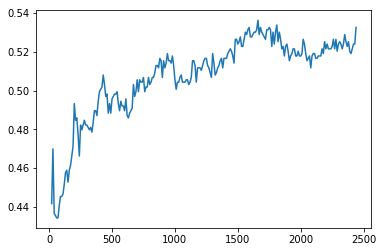

In [39]:
plt.plot(N,Score)

## Bajaremos de dimensión

In [41]:
T = tsne.tsne(X = X, perplexity=60)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 4075...
Computing P-values for point 500 of 4075...
Computing P-values for point 1000 of 4075...
Computing P-values for point 1500 of 4075...
Computing P-values for point 2000 of 4075...
Computing P-values for point 2500 of 4075...
Computing P-values for point 3000 of 4075...
Computing P-values for point 3500 of 4075...
Computing P-values for point 4000 of 4075...
Mean value of sigma: 0.727629
Iteration 10: error is 21.843754
Iteration 20: error is 20.452757
Iteration 30: error is 17.327725
Iteration 40: error is 16.625222
Iteration 50: error is 16.262915
Iteration 60: error is 16.017622
Iteration 70: error is 15.897312
Iteration 80: error is 15.965632
Iteration 90: error is 16.026851
Iteration 100: error is 16.096997
Iteration 110: error is 2.370779
Iteration 120: error is 2.038301
Iteration 130: error is 1.827074
Iteration 140: error is 1.685200
Iteration 150: error is 1.581916
Itera

In [42]:
def plot(x, colors):
    palette = np.array(sns.color_palette("hls", 10))  #Choosing color palette 

    # Create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    # Add the labels for each digit.
    txts = []
    for i in range(-1,2,1):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([pa.Stroke(linewidth=5, foreground="w"), pa.Normal()])
        txts.append(txt)
    return f, ax, txts

(<Figure size 576x576 with 1 Axes>,
 [Text(3.3068593016493706, -3.78453536610041, '-1'),
  Text(-3.160599868613131, 3.870437824496072, '0'),
  Text(3.042313006647736, -3.6958229856688245, '1')])

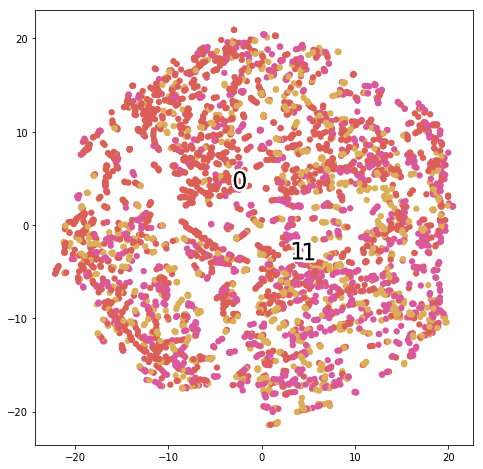

In [43]:
plot(T, Y.values)

## Sleccionaremos el mejor modelo con ésta dimensión

In [44]:
embbebed_X_tr, embbebed_Y_tr, embbebed_X2_va, embbebed_Y2_va, embbebed_X2_ts, embbebed_Y2_ts  = split_data_for_model_training(T,Y, training_sample_size, validation_sample_size)

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [ ]:
n = optim_n_for_tree(X.shape[1])
w = main_fun(Epsilon, delta,X2_ts, Y2_ts, X_tr, Y_tr, set_parameters, n)

In [45]:
n_embbebed = optim_n_for_tree(T.shape[1])
print("n min optimo")
print(n_embbebed)
w_embbebed = main_fun(Epsilon, delta, embbebed_X2_ts, embbebed_Y2_ts, embbebed_X_tr, embbebed_Y_tr, set_parameters, n_embbebed)

n min optimo
3


D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppDa

In [46]:
max(w_embbebed, key = lambda t: t[2])

(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l1', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False),
 array([-1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,
         0,  0, -1, -1, -1, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,
         0, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,
        -1, -1,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        -1, -1, -1, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0, -1,  0, -1,  0,
         0, -1, -1, -1, -1, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,
         0,  0, -1, -1,  0,  0,  0, -1,  0, -1, -1, -1, -1,  0,  0, -1,  0,
         0,  0,  0, -1,  0,  0, -1, -1,  0,  0,  0,  0, -1, -1, -1, -1,  0,
        -1, -1, -1,  0,  0,  0, -1,  0, -1,  0,  0, -1, -1,  0, -1, -1,  0,
         0,  0,  0, -1, -1, -1, -1,  0, -1, -1,

In [47]:
min(w, key = lambda t: t[2])

(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False),
 array([ 0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,
        -1,  0, -1, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1, -1,  0, -1,
         0,  0,  0,  0, -1,  0,  0, -1,  0, -1, -1,  0,  0, -1,  0, -1,  0,
         0,  0,  0,  0,  0,  1,  0,  0, -1,  0, -1, -1, -1, -1, -1,  0, -1,
         0,  0,  0,  0, -1,  0, -1, -1, -1, -1,  0,  0,  0,  0, -1,  0, -1,
         0, -1,  1,  0, -1,  0,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        -1,  0, -1,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0, -1, -1,
        -1, -1,  0, -1,  0, -1, -1,  0,  0,  0, -1,  0,  0,  0, -1,  0, -1,
        -1,  0,  0, -1, -1, -1,  0,  0, -1,  0, -1, -1, -1,  0,  0,  0, -1,
         0,  0, -1, -1, -1,  0,  0,  0,  0,  0,

In [48]:
N_embbebed, Score_embbebed = show_me_the_money(embbebed_X2_va, embbebed_Y2_va, embbebed_X_tr, embbebed_Y_tr,'l1' , 100)

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, w

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, w

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Future

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Future

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, w

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, w

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, w

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  Future

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, w

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Future

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Future

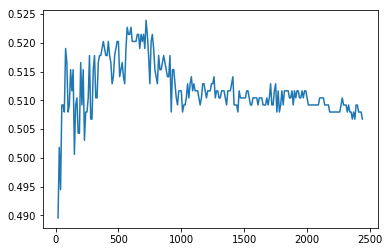

In [49]:
plt.plot(N_embbebed,Score_embbebed)